# Datathon Info

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
#install.packages("gridExtra")
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
sales = read_csv("sales.csv")
head(sales)
items = read_csv("items.csv")
head(items)

Rows: 32605 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): item_name, transaction_type, own_cup
dbl  (1): customer_id
lgl  (1): surcharge
date (1): date
time (1): time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,time,item_name,transaction_type,own_cup,surcharge,customer_id
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786


Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 17 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): item_name, item_type, drink_temperature, drink_type
dbl (2): price, production_cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


item_name,price,production_cost,item_type,drink_temperature,drink_type
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Espresso,3.00,0.80,Drink,Hot,Coffee
Americano,3.50,1.00,Drink,Hot,Coffee
Latte,4.50,1.20,Drink,Hot,Coffee
Cappuccino,4.25,1.15,Drink,Hot,Coffee
Flat White,4.75,1.25,Drink,Hot,Coffee
Mocha,4.80,1.40,Drink,Hot,Coffee


In [3]:
items_mutate <- items %>%
        mutate(profit = price - production_cost)
head(items_mutate)


items_summary <- items %>%
        group_by(item_name) %>%
        summarize(mean_price = mean(price),
               mean_prod_cost = mean(production_cost),
                 mean_profit = mean_price - mean_prod_cost) %>%
        arrange(-mean_profit)
items_summary

item_name,price,production_cost,item_type,drink_temperature,drink_type,profit
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Espresso,3.00,0.80,Drink,Hot,Coffee,2.2
Americano,3.50,1.00,Drink,Hot,Coffee,2.5
Latte,4.50,1.20,Drink,Hot,Coffee,3.3
Cappuccino,4.25,1.15,Drink,Hot,Coffee,3.1
Flat White,4.75,1.25,Drink,Hot,Coffee,3.5
Mocha,4.80,1.40,Drink,Hot,Coffee,3.4


item_name,mean_price,mean_prod_cost,mean_profit
<chr>,<dbl>,<dbl>,<dbl>
Coffee Beans (1 lb),18.00,8.00,10.00
Reusable Coffee Cup,15.00,6.00,9.00
Tote Bag,12.00,4.00,8.00
Iced Matcha Latte,5.25,1.60,3.65
Matcha Latte,5.25,1.60,3.65
Flat White,4.75,1.25,3.50
Chai Latte,4.90,1.50,3.40
Cold Brew,4.75,1.35,3.40
Mocha,4.80,1.40,3.40


In [4]:
sales_summary <- sales %>%
        group_by(item_name) %>%
        summarize(n = n()) %>%
        arrange(-n)
sales_summary

item_name,n
<chr>,<int>
Iced Matcha Latte,3279
Iced Coffee,2695
Green Tea,2639
Latte,2439
Americano,2392
Iced Latte,2367
Chai Latte,2362
Mocha,2300
Cappuccino,2179


One can see from the data that Iced Matcha Latte's are the most popular drink. Thus, we would suggest the cafe makes more variety of Iced Matcha Latte's such as strawberry matcha, espresso matcha, matcha slushies, etc. Matcha Latte's are also the drink with the highest profit margin so customers are willing to spend more on these more fancy variants.

In [5]:
only_drink_sales <- sales %>%
    filter(own_cup != "N/A") 

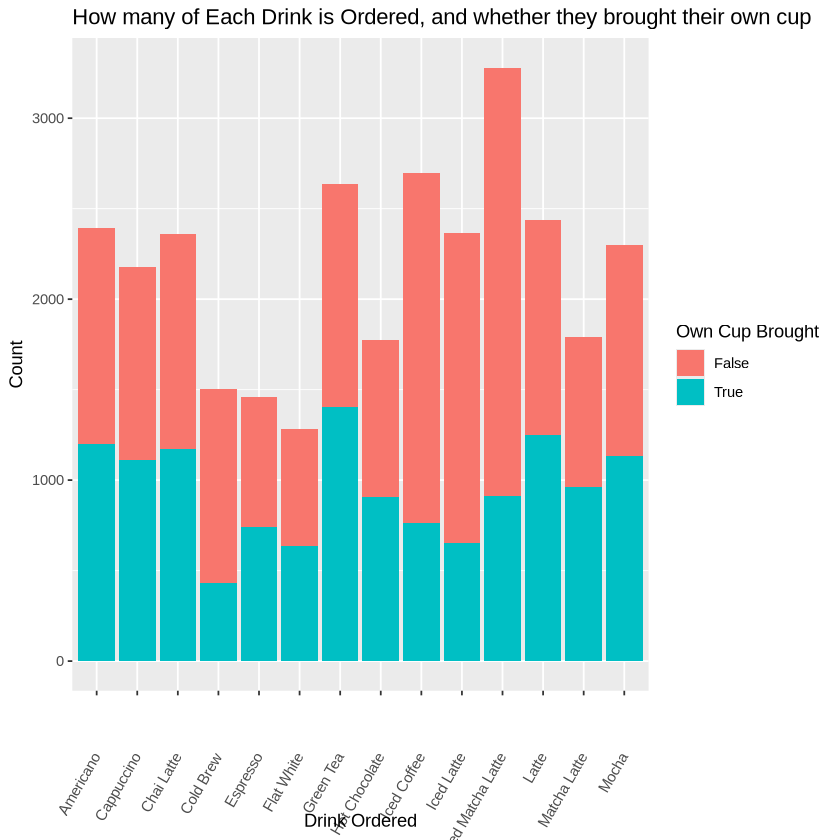

In [6]:
graph <- only_drink_sales %>%
    ggplot(aes(x = item_name, fill = own_cup)) +
    geom_bar() +
    labs(x = "Drink Ordered", y = "Count", title = "How many of Each Drink is Ordered, and whether they brought their own cup", fill = "Own Cup Brought") +
    theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1))
graph

In [7]:
most_often_customer <- sales %>%
    group_by(customer_id) %>%
    mutate(number_of_visits = n()) %>%
    arrange(-number_of_visits) %>%
    filter(number_of_visits > 50)
head(most_often_customer)

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,number_of_visits
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<int>
2022-01-01,11:51:50,Cold Brew,Takeout,True,FALSE,20890,738
2022-01-02,12:21:48,Iced Matcha Latte,Takeout,False,FALSE,20890,738
2022-01-03,11:21:57,Chai Latte,Takeout,False,FALSE,20890,738
2022-01-06,10:43:02,Cold Brew,Takeout,False,FALSE,20890,738
2022-01-07,13:46:33,Iced Latte,Takeout,True,FALSE,20890,738
2022-01-07,13:46:33,Coffee Beans (1 lb),Takeout,N/A,FALSE,20890,738


In [8]:
less_often_customer <- sales %>%
    group_by(customer_id) %>%
    mutate(number_of_visits = n()) %>%
    arrange(-number_of_visits) %>%
    filter(number_of_visits < 50)
head(less_often_customer)

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,number_of_visits
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<int>
2022-01-02,10:25:25,Americano,Takeout,False,FALSE,2674,49
2022-01-10,09:32:04,Mocha,Dine-in,False,FALSE,2674,49
2022-01-14,07:10:32,Latte,Takeout,False,FALSE,21717,49
2022-01-15,12:16:56,Hot Chocolate,Takeout,False,FALSE,2674,49
2022-01-16,10:38:35,Cappuccino,Takeout,False,FALSE,2674,49
2022-01-18,08:37:29,Matcha Latte,Takeout,True,FALSE,7259,49


The customers above have all visited the store more than 50 times. This indicates that they greatly enjoy the experience at the cafe. We could look into more depth and detail what these specific customers seem to do, and target other customers who are similar. 

In [9]:
most_likely_in_general <- less_often_customer %>%
        ggplot(aes(x = transaction_type, fill = own_cup)) +
        geom_bar() +
        labs(x = "Whether a Customer Dined-In or Got Take-Out", title = "Count of Transaction Type and Whether Own Cup was Brought", subtitle =  "Customers Visiting Less than 50 Times.")

In [10]:
most_likely <- most_often_customer %>%
        ggplot(aes(x = transaction_type, fill = own_cup)) +
        geom_bar() +
        labs(x = "Whether a Customer Dined-In or Got Take-Out", title = "Count of Transaction Type and Whether Own Cup was Brought", subtitle =  "Customers Visiting More than 50 Times.")

In [25]:
most_likely_item <- most_often_customer %>%
        ggplot(aes(x = item_name, fill = transaction_type)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1)) +
        labs(x = "Type of Drink Customer Bought", title = "Count of Drink Type and Whether Own Cup was Brought", subtitle =  "Customers Visiting More than 50 Times.")

In [26]:
most_likely_item_in_general <- less_often_customer %>%
        ggplot(aes(x = item_name, fill = transaction_type)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1)) +
         labs(x = "Type of Drink Customer Bought", title = "Count of Drink Type and Whether Dine-in or Takeout", subtitle =  "Customers Visiting Less than 50 Times.")

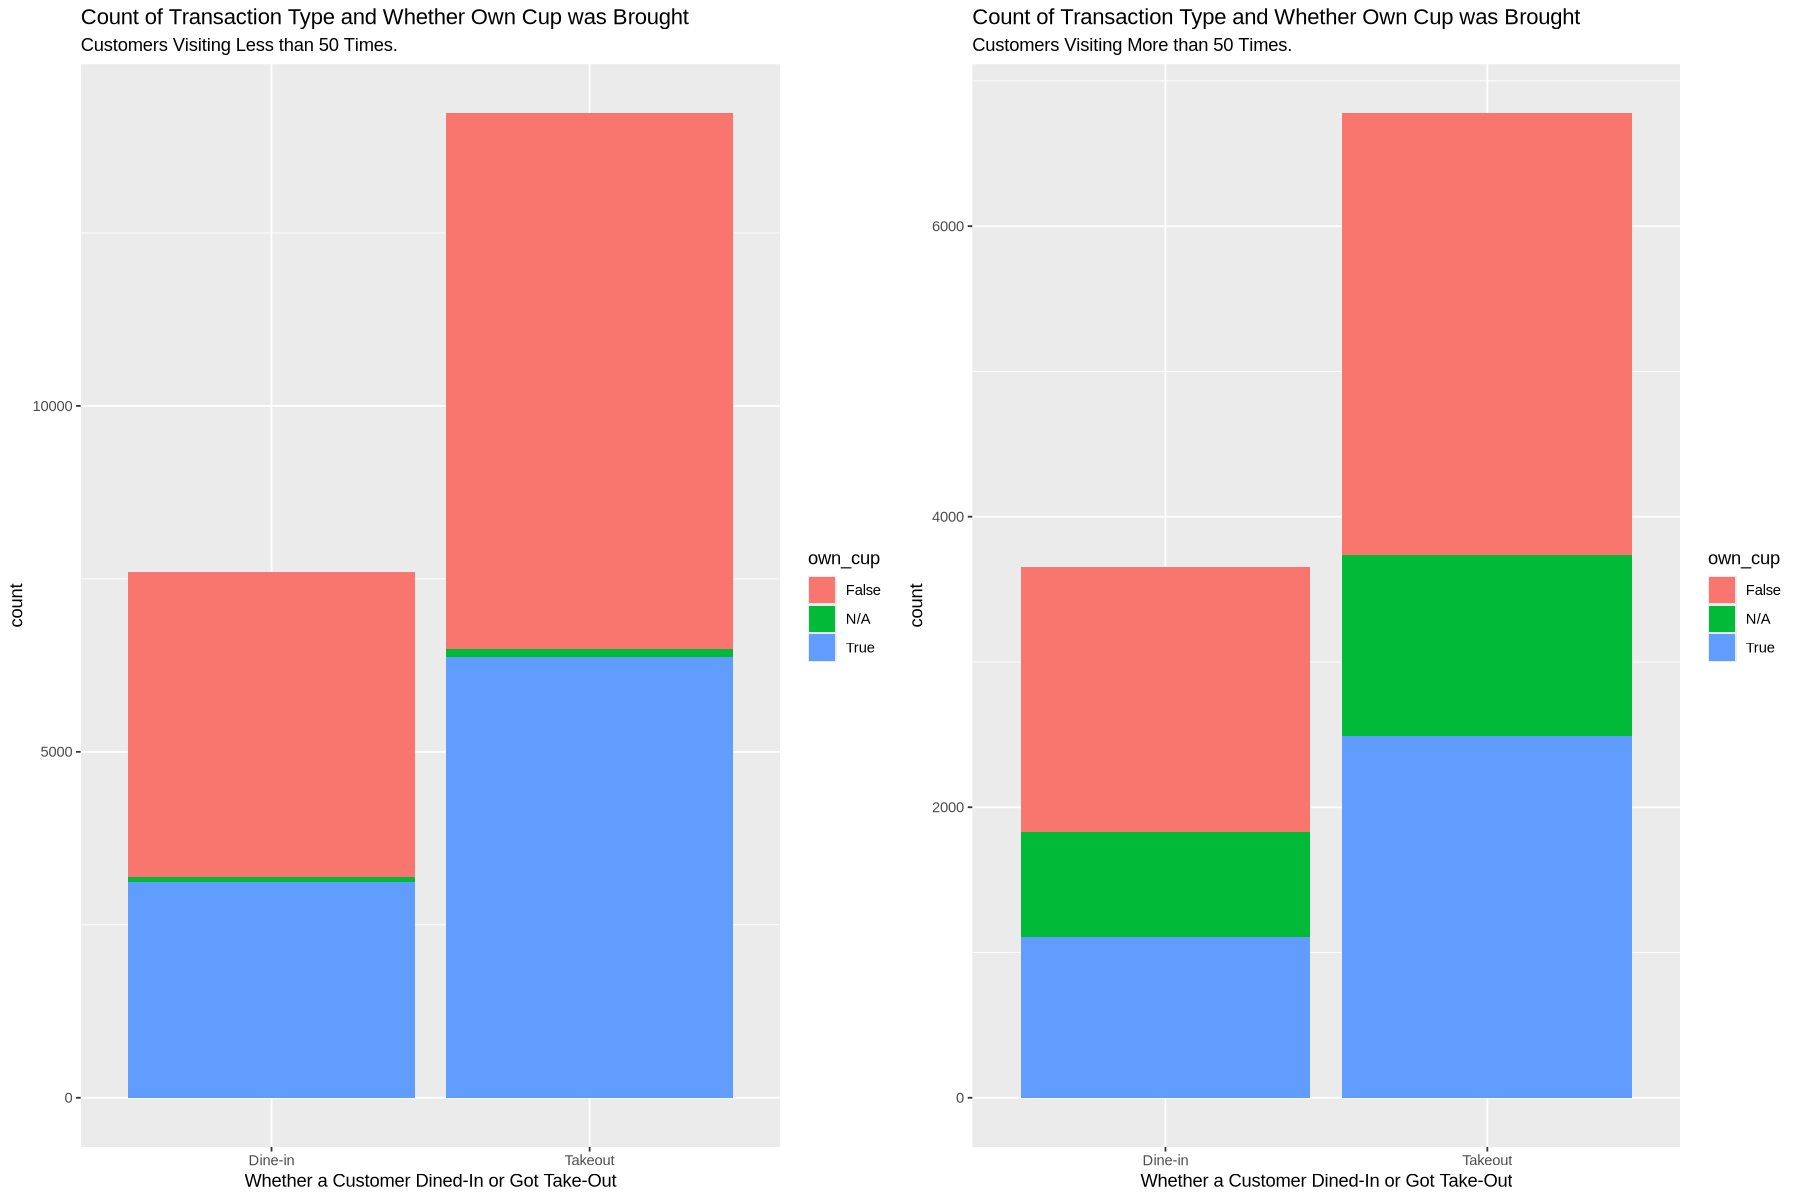

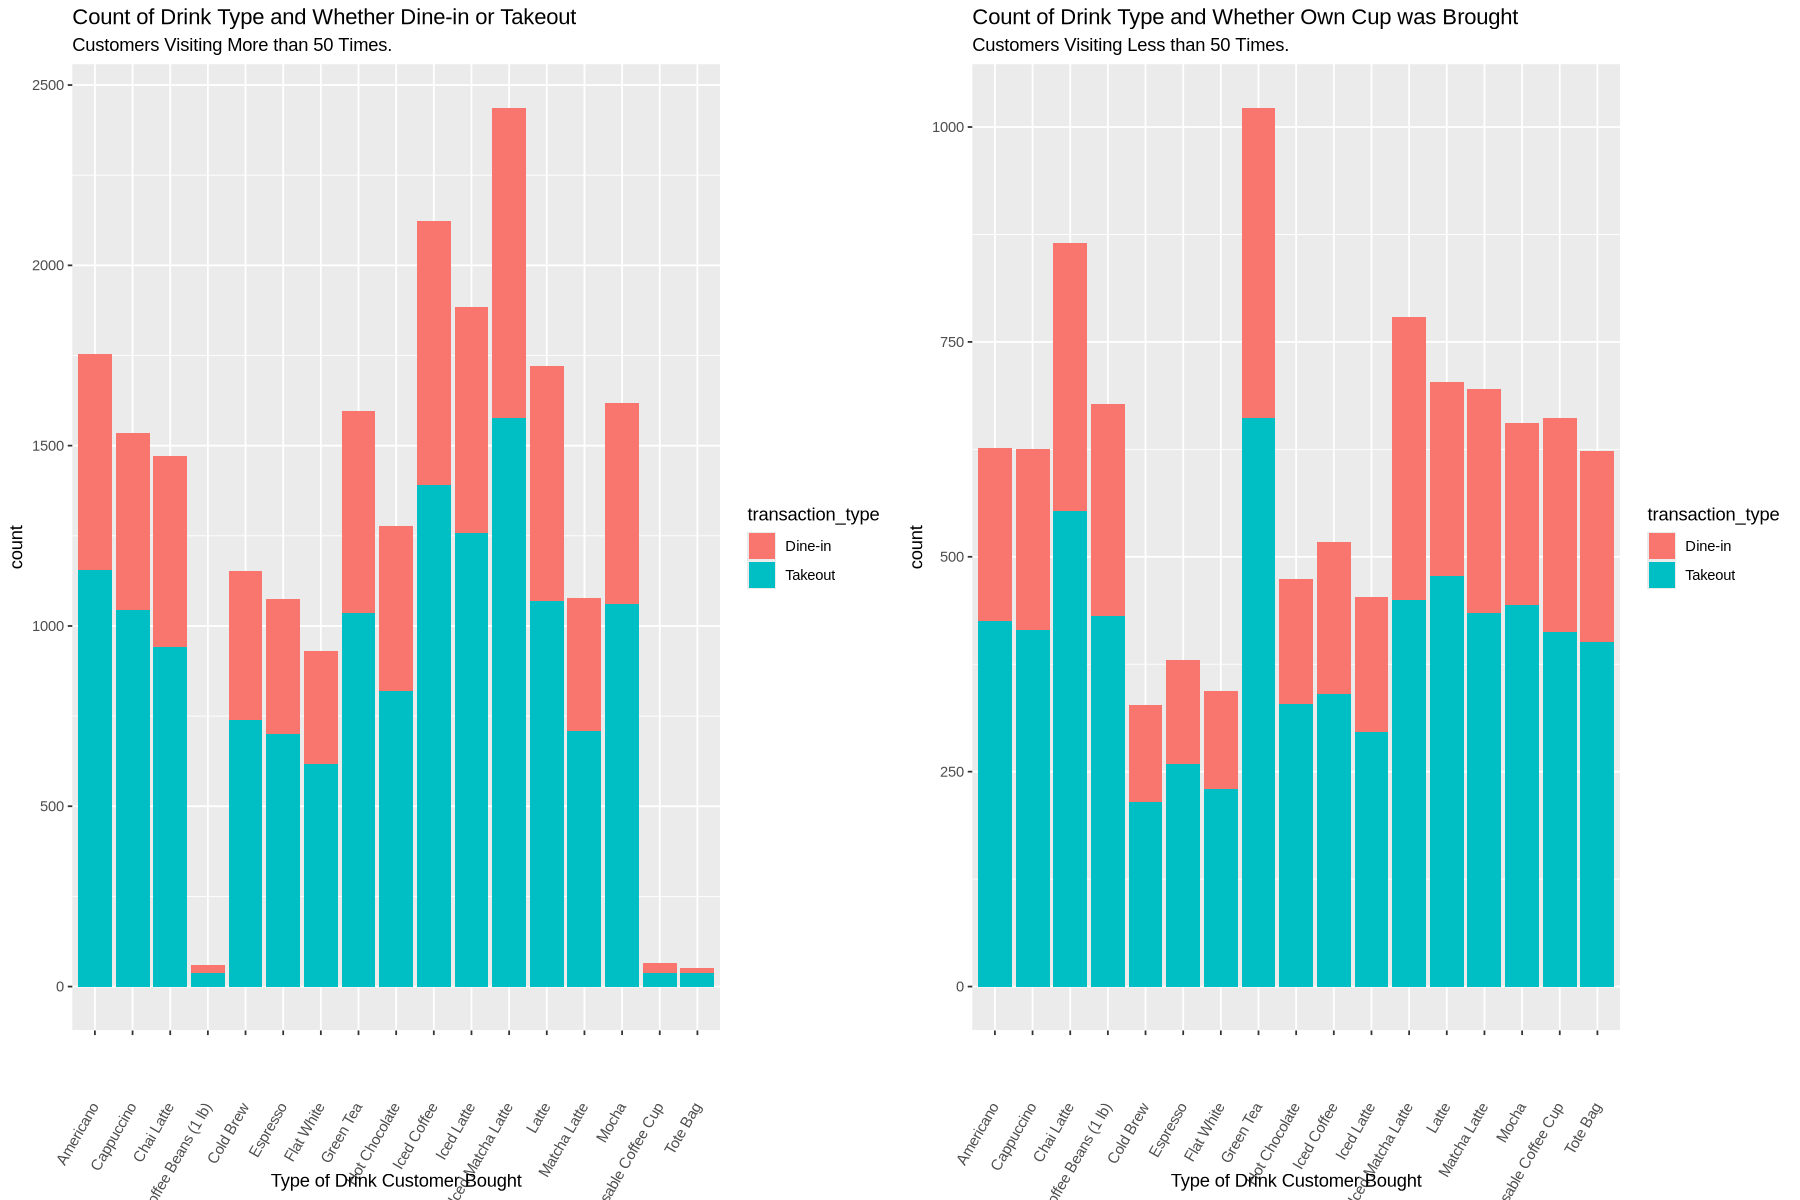

In [13]:
options(repr.plot.width=15, repr.plot.height=10)

grid.arrange(most_likely_in_general, most_likely, nrow = 1)
grid.arrange(most_likely_item_in_general, most_likely_item, nrow = 1)

- 7 to 10 is morning group
- 10 - 1 is mid day
- 1 - 4 is afternoon 

Customers who are coming more often are way more likely to 

In [14]:
sales_time <- sales %>%
  mutate(hour = hour(time), 
      time_period = case_when(
    hour >= 7 & hour < 10 ~ "Morning",
    hour >= 10 & hour < 13 ~ "Afternoon",
    hour >= 13 & hour < 16 ~ "Evening",
    TRUE ~ "Night"
  ))

In [15]:
sales_morning <- sales_time %>%
    filter(time_period == "Morning") %>%
    select(-time_period)
sales_morning

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,hour
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<int>
2022-01-01,07:03:30,Cold Brew,Takeout,True,FALSE,26946,7
2022-01-01,07:30:58,Iced Coffee,Takeout,True,FALSE,24356,7
2022-01-01,08:32:23,Iced Latte,Takeout,False,FALSE,3760,8
2022-01-01,08:45:03,Latte,Dine-in,True,FALSE,5900,8
2022-01-01,09:03:47,Latte,Takeout,False,FALSE,11589,9
2022-01-02,07:09:02,Iced Matcha Latte,Takeout,False,FALSE,10167,7
2022-01-02,07:30:08,Matcha Latte,Dine-in,True,FALSE,20155,7
2022-01-02,07:40:06,Latte,Takeout,False,FALSE,28392,7
2022-01-02,07:56:27,Green Tea,Takeout,False,FALSE,12458,7


In [16]:
sales_midday <- sales_time %>%
    filter(time_period == "Afternoon") %>%
    select(-time_period)
sales_midday

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,hour
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<int>
2022-01-01,10:02:30,Flat White,Takeout,True,FALSE,1786,10
2022-01-01,10:29:29,Iced Latte,Takeout,False,FALSE,904,10
2022-01-01,10:53:39,Flat White,Takeout,True,FALSE,4942,10
2022-01-01,10:59:50,Americano,Dine-in,True,FALSE,7692,10
2022-01-01,11:02:54,Chai Latte,Takeout,False,FALSE,25702,11
2022-01-01,11:10:10,Iced Coffee,Takeout,True,FALSE,28392,11
2022-01-01,11:37:42,Matcha Latte,Takeout,False,FALSE,22643,11
2022-01-01,11:51:50,Cold Brew,Takeout,True,FALSE,20890,11
2022-01-01,12:35:16,Iced Latte,Takeout,True,FALSE,24017,12


In [17]:
sales_evening <- sales_time %>%
    filter(time_period == "Evening") %>%
    select(-time_period)
sales_evening

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,hour
<date>,<time>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<int>
2022-01-01,14:04:54,Latte,Takeout,True,FALSE,25267,14
2022-01-01,15:30:23,Cold Brew,Dine-in,True,FALSE,7962,15
2022-01-01,15:55:21,Iced Coffee,Takeout,True,FALSE,3881,15
2022-01-02,13:53:48,Cold Brew,Takeout,False,FALSE,11904,13
2022-01-02,15:16:40,Iced Coffee,Dine-in,False,FALSE,5900,15
2022-01-02,15:17:53,Americano,Takeout,True,FALSE,24356,15
2022-01-02,15:26:48,Espresso,Takeout,True,FALSE,11609,15
2022-01-02,15:41:22,Hot Chocolate,Dine-in,False,FALSE,24899,15
2022-01-02,15:57:41,Chai Latte,Takeout,True,FALSE,4741,15


In [18]:
morning_plot <- sales_morning %>%
        ggplot(aes(x = item_name, fill = transaction_type)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1)) +
        labs(x = "Item Bought", fill = "Whether Customer Will be Dine-in or Takeout", title = "Count of Items Bought Split for Different Transaction Types", subtitle = "For Customers in the Morning")

In [19]:
midday_plot <- sales_midday %>%
        ggplot(aes(x = item_name, fill = transaction_type)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1)) +
        labs(x = "Item Bought", fill = "Whether Customer Will be Dine-in or Takeout", title = "Count of Items Bought Split for Different Transaction Types", subtitle = "For Customers in the Midday")

In [20]:
evening_plot <- sales_evening %>%
        ggplot(aes(x = item_name, fill = transaction_type)) +
        geom_bar() +
        theme(axis.text.x = element_text(angle = 60, vjust = 0.5, hjust=1)) +
        labs(x = "Item Bought", fill = "Whether Customer Will be Dine-in or Takeout", title = "Count of Items Bought Split for Different Transaction Types", subtitle = "For Customers in the Afternoon")

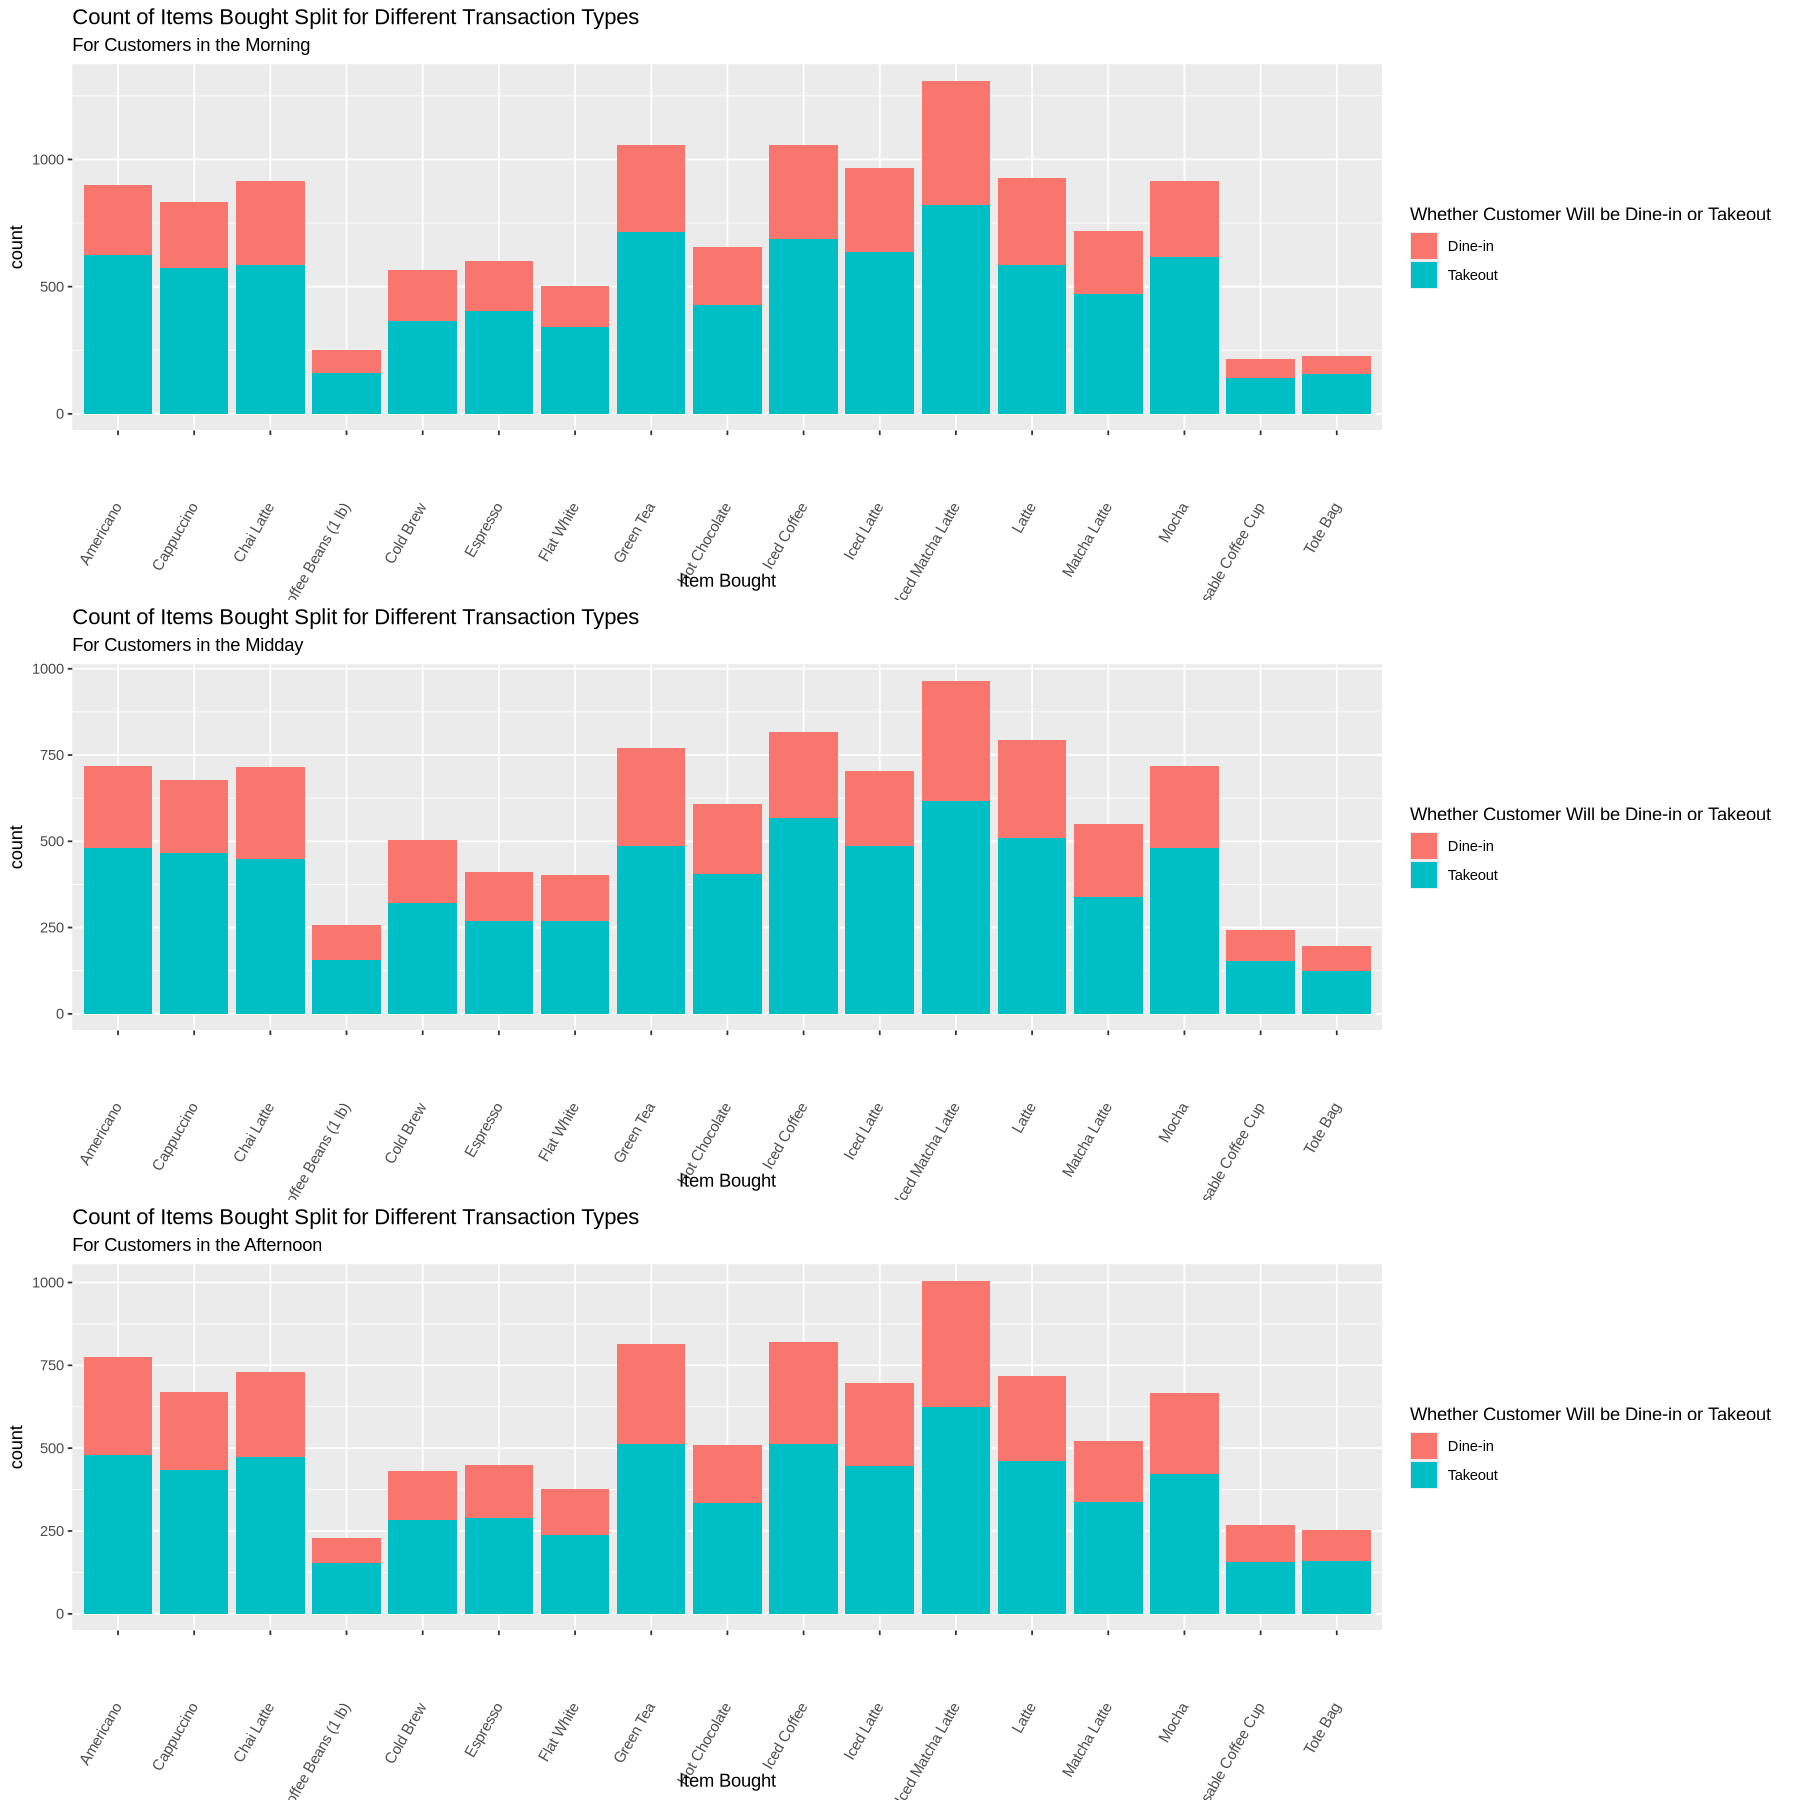

In [21]:
options(repr.plot.width=15, repr.plot.height=15)
grid.arrange(morning_plot, midday_plot, evening_plot)

In [22]:
sales_time2 <- sales_time %>%
        filter(item_name != "Coffee Beans (1 lb)" & item_name != "Reusable Coffe Cup" & item_name != "Tote Bag") %>%
        mutate(transaction_type = as.factor(transaction_type),
               item_name = as.factor(item_name),
               time_period = as.factor(time_period),
               own_cup = ifelse(own_cup == "True", 1, 0)
              ) 
head(sales_time2)

date,time,item_name,transaction_type,own_cup,surcharge,customer_id,hour,time_period
<date>,<time>,<fct>,<fct>,<dbl>,<lgl>,<dbl>,<int>,<fct>
2022-01-01,07:03:30,Cold Brew,Takeout,1,FALSE,26946,7,Morning
2022-01-01,07:30:58,Iced Coffee,Takeout,1,FALSE,24356,7,Morning
2022-01-01,08:32:23,Iced Latte,Takeout,0,FALSE,3760,8,Morning
2022-01-01,08:45:03,Latte,Dine-in,1,FALSE,5900,8,Morning
2022-01-01,09:03:47,Latte,Takeout,0,FALSE,11589,9,Morning
2022-01-01,10:02:30,Flat White,Takeout,1,FALSE,1786,10,Afternoon


In [23]:
model <- glm(own_cup ~item_name + transaction_type + time_period, family = "quasibinomial", data = sales_time2)

In [24]:
summary(model)


Call:
glm(formula = own_cup ~ item_name + transaction_type + time_period, 
    family = "quasibinomial", data = sales_time2)

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -0.15112    0.04721  -3.201 0.001370 ** 
item_nameCappuccino            0.03257    0.05864   0.555 0.578650    
item_nameChai Latte           -0.01872    0.05744  -0.326 0.744564    
item_nameCold Brew            -0.90383    0.06938 -13.027  < 2e-16 ***
item_nameEspresso              0.02120    0.06575   0.322 0.747186    
item_nameFlat White           -0.02649    0.06854  -0.386 0.699176    
item_nameGreen Tea             0.12410    0.05596   2.218 0.026567 *  
item_nameHot Chocolate         0.03739    0.06206   0.602 0.546856    
item_nameIced Coffee          -0.93959    0.05859 -16.037  < 2e-16 ***
item_nameIced Latte           -0.97623    0.06095 -16.017  < 2e-16 ***
item_nameIced Matcha Latte    -0.95545    0.05592 -17.086  < 2e-16 ***
item_na